In [1]:
import pandas as pd
data = pd.read_csv('timeData.csv')
#change name
data = data.rename(columns={"Unnamed: 0": "Name"})
#NaN to 0
data = data.fillna(0)
#select team
team = ['レイ','ヒヨリ（ニューイヤー）','ジータ','クリスティーナ','シズル（バレンタイン）']
selectData = pd.DataFrame(columns = data.columns)
#add select rows
for i in range(data.shape[0]):
    if data.loc[i][0] in team:
        print(data.loc[i][0])
        selectData.loc[i] = data.loc[i]
#rename index
selectData.index = [0,1,2,3,4]
nameList = selectData['Name'].tolist()

ヒヨリ（ニューイヤー）
ジータ
レイ
クリスティーナ
シズル（バレンタイン）


In [2]:
nameList

['ヒヨリ（ニューイヤー）', 'ジータ', 'レイ', 'クリスティーナ', 'シズル（バレンタイン）']

In [3]:
#skill name and time
selectDict = {}
noList = [0,'普通攻击']
for i in range(selectData.shape[0]):
    selectDict[nameList[i]] = list()
    for j in range(1,selectData.shape[1]):
        if selectData.loc[i][j] not in noList:
            skill = selectData.loc[i][j]
            time = selectData.columns[j]
            selectDict[nameList[i]].append([skill,time])

In [4]:
selectDict

{'ヒヨリ（ニューイヤー）': [['技能1：肉球チャージ', '1:24'],
  ['技能2：グッドラックパンチ', '1:21'],
  ['技能2：グッドラックパンチ', '1:12'],
  ['技能1：肉球チャージ', '1:9'],
  ['技能2：グッドラックパンチ', '1:2'],
  ['技能1：肉球チャージ', '0:54'],
  ['技能2：グッドラックパンチ', '0:42'],
  ['技能2：グッドラックパンチ', '0:31'],
  ['技能1：肉球チャージ', '0:28'],
  ['技能2：グッドラックパンチ', '0:20'],
  ['技能1：肉球チャージ', '0:13'],
  ['技能2：グッドラックパンチ', '0:1']],
 'ジータ': [['技能1：ワイドブレード', '1:24'],
  ['技能2：ウェポンバースト', '1:20'],
  ['技能1：ワイドブレード', '1:8'],
  ['技能2：ウェポンバースト', '1:1'],
  ['技能1：ワイドブレード', '0:51'],
  ['技能2：ウェポンバースト', '0:43'],
  ['技能1：ワイドブレード', '0:33'],
  ['技能2：ウェポンバースト', '0:26'],
  ['技能1：ワイドブレード', '0:15'],
  ['技能2：ウェポンバースト', '0:8']],
 'レイ': [['技能1：ウィンドスラスト', '1:21'],
  ['技能2：カウンタースラッシュ', '1:18'],
  ['技能1：ウィンドスラスト', '1:5'],
  ['技能2：カウンタースラッシュ', '0:59'],
  ['技能1：ウィンドスラスト', '0:47'],
  ['技能2：カウンタースラッシュ', '0:41'],
  ['技能1：ウィンドスラスト', '0:29'],
  ['技能2：カウンタースラッシュ', '0:23'],
  ['技能1：ウィンドスラスト', '0:11'],
  ['技能2：カウンタースラッシュ', '0:5']],
 'クリスティーナ': [['技能1：オーバーレイ', '1:24'],
  ['技能2：インジェクション', '1:21'],
  ['技能2：インジェクシ

In [5]:
#Only skill time
timeDict = {}
for i, (key, value) in enumerate(selectDict.items()):
    timeDict[nameList[i]] = list()
    skills1 = []
    skills2 = []
    for j in range(len(value)):
        if value[j][0][:3] == '技能1':
            skills1.append(value[j][1])
        else:
            skills2.append(value[j][1])
    timeDict[nameList[i]].append(skills1)
    timeDict[nameList[i]].append(skills2)
#         timeDict[nameList[i]].append(value[j][1])

In [6]:
timeDict

{'ヒヨリ（ニューイヤー）': [['1:24', '1:9', '0:54', '0:28', '0:13'],
  ['1:21', '1:12', '1:2', '0:42', '0:31', '0:20', '0:1']],
 'ジータ': [['1:24', '1:8', '0:51', '0:33', '0:15'],
  ['1:20', '1:1', '0:43', '0:26', '0:8']],
 'レイ': [['1:21', '1:5', '0:47', '0:29', '0:11'],
  ['1:18', '0:59', '0:41', '0:23', '0:5']],
 'クリスティーナ': [['1:24', '1:5', '0:48', '0:26', '0:9'],
  ['1:21', '1:12', '1:2', '0:51', '0:41', '0:34', '0:23', '0:12', '0:2']],
 'シズル（バレンタイン）': [['1:16', '1:4', '0:45', '0:34', '0:15', '0:4'],
  ['1:24', '1:7', '0:52', '0:37', '0:22', '0:6']]}

In [7]:
for i, (key, value) in enumerate(timeDict.items()):
    for j in range(len(value)):
        for k in range(len(value[j])):
            value[j][k] = int(value[j][k].split(':')[0]) * 60 + int(value[j][k].split(':')[1])

In [8]:
timeDict

{'ヒヨリ（ニューイヤー）': [[84, 69, 54, 28, 13], [81, 72, 62, 42, 31, 20, 1]],
 'ジータ': [[84, 68, 51, 33, 15], [80, 61, 43, 26, 8]],
 'レイ': [[81, 65, 47, 29, 11], [78, 59, 41, 23, 5]],
 'クリスティーナ': [[84, 65, 48, 26, 9], [81, 72, 62, 51, 41, 34, 23, 12, 2]],
 'シズル（バレンタイン）': [[76, 64, 45, 34, 15, 4], [84, 67, 52, 37, 22, 6]]}

In [9]:
gntTimeList = []
for i, (key, value) in enumerate(timeDict.items()):
    gntTimeList.append(value)

In [10]:
gntTimeList

[[[84, 69, 54, 28, 13], [81, 72, 62, 42, 31, 20, 1]],
 [[84, 68, 51, 33, 15], [80, 61, 43, 26, 8]],
 [[81, 65, 47, 29, 11], [78, 59, 41, 23, 5]],
 [[84, 65, 48, 26, 9], [81, 72, 62, 51, 41, 34, 23, 12, 2]],
 [[76, 64, 45, 34, 15, 4], [84, 67, 52, 37, 22, 6]]]

In [11]:
#預設技能經過時間 1秒
for i in range(len(gntTimeList)):
    for j in range(len(gntTimeList[i])):
        for k in range(len(gntTimeList[i][j])):
            gntTimeList[i][j][k] = (gntTimeList[i][j][k],-1)

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [14]:
nameList

['ヒヨリ（ニューイヤー）', 'ジータ', 'レイ', 'クリスティーナ', 'シズル（バレンタイン）']

In [15]:
spaceList = nameList.copy()
spaceList.reverse()
spaceList.append('-')
spaceList

['シズル（バレンタイン）', 'クリスティーナ', 'レイ', 'ジータ', 'ヒヨリ（ニューイヤー）', '-']

In [26]:
data = pd.read_csv('select.csv')
data = data.drop(data.columns[0], axis=1)

In [27]:
class Characeter:
    def __init__(self,level):
        self.level = level
        self.hitPower = 0
        self.hitTime = 0
        self.hit = 0
    def checkHit(self):
        if self.hit:
            self.hitTime -= 1
            if self.hitTime > 0:
                return 0
            else:
                self.hit = 0
                return self.hitPower
        else:
            return 0
        
class Rei(Characeter):
    def __init__(self,level):
        super().__init__(level)
        self.hitPower = 0.6 + 0.6 * self.level
    def checkSkill(self,skill):
        if skill == '技能1：ウィンドスラスト':
            return self.up()
        else:
            return 0
    def up(self):
        if self.hit:
            return 0
        else:
            self.hit = 1
            self.hitTime = 12
            return self.hitPower
    
class Christina(Characeter):
    def __init__(self,level):
        super().__init__(level)
        self.hitPower = 0.6 + 0.6 * self.level
    def checkSkill(self,skill):
        if skill == '技能2：インジェクション':
            return self.up()
        else:
            return 0
    def up(self):
        if self.hit:
            return 0
        else:
            self.hit = 1
            self.hitTime = 12
            return self.hitPower
    
class ShizuruValentine(Characeter):
    def __init__(self,level):
        super().__init__(level)
        self.hitPower = 0.15 + 0.15 * self.level
    def checkSkill(self,skill):
        if skill == '技能2：セグメントハートショット':
            return self.up()
        else:
            return 0
    def up(self):
        if self.hit:
            return 0
        else:
            self.hit = 1
            self.hitTime = 12
            return self.hitPower

In [28]:
#Input
level = 172
a = Rei(level)
b = Christina(level)
c = ShizuruValentine(level)
objList = [a,b,c]

In [29]:
countList = []
count = 0
for j in range(data.shape[1]):
    for i in range(data.shape[0]):
        for obj in objList:
            count += obj.checkSkill(data.loc[i][j])
    for obj in objList:
        count -= obj.checkHit()
    countList.append(count)

In [30]:
timeList = data.columns.tolist()
timeList = timeList[1:]
countList = countList[1:]

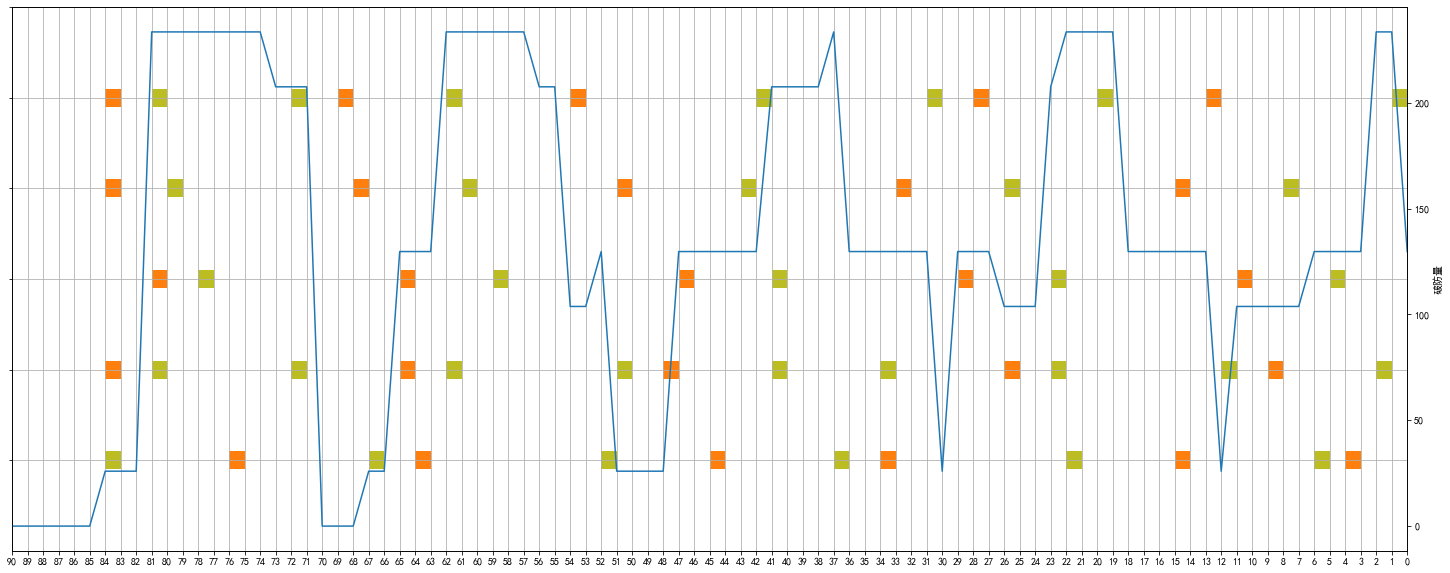

In [56]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline 
# Declaring a figure "gnt" 
fig, gnt = plt.subplots(figsize=(25,10)) 

plot = gnt.twinx()

#plot.ylabel('破防量')

plot.plot(my_x_ticks, hits)

# Setting Y-axis limits 
gnt.set_ylim(0, 50) 
  
# Setting X-axis limits

my_x_ticks = np.arange(90, -1, -1)

plt.xticks(my_x_ticks)

gnt.set_xlim(90,0)
  
# Setting ticks on y-axis 
gnt.set_yticks([10, 20, 30, 40, 50, 60]) 
# Labelling tickes of y-axis 
gnt.axes.yaxis.set_ticklabels([])
  
# Setting graph attribute 
gnt.grid(True) 
  
# Declaring a bar in schedule 
gnt.broken_barh(gntTimeList[0][0], (49, 2), facecolors =('#ff7f0e'))

gnt.broken_barh(gntTimeList[0][1], (49, 2), facecolors =('#bcbd22'))

gnt.broken_barh(gntTimeList[1][0], (39, 2), facecolors =('#ff7f0e'))

gnt.broken_barh(gntTimeList[1][1], (39, 2), facecolors =('#bcbd22'))
  
gnt.broken_barh(gntTimeList[2][0], (29, 2), facecolors =('#ff7f0e'))

gnt.broken_barh(gntTimeList[2][1], (29, 2), facecolors =('#bcbd22'))
                 
gnt.broken_barh(gntTimeList[3][0], (19, 2), facecolors =('#ff7f0e'))

gnt.broken_barh(gntTimeList[3][1], (19, 2), facecolors =('#bcbd22'))
    
gnt.broken_barh(gntTimeList[4][0], (9, 2), facecolors =('#ff7f0e'))

gnt.broken_barh(gntTimeList[4][1], (9, 2), facecolors =('#bcbd22'))

hits = countList
times = timeList
plot.set_xlabel('剩餘時間') 
plot.set_ylabel('破防量')

plt.savefig("combine.png",bbox_inches='tight',
            pad_inches=0,
            format='png',
            dpi=300)